### Amazon Stock Price prediction using RNN

Project Description:

 The project focuses on predicting Amazon's stock price using Recurrent Neural Networks (RNNs), a type of neural network that is particularly well-suited for sequential data such as time series. By leveraging historical stock price data, this project aims to create a predictive model that can forecast future prices with improved accuracy. Stock market prediction is inherently challenging due to its high volatility and sensitivity to external factors, but machine learning models, especially RNNs, are capable of capturing underlying trends and patterns in the data.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
dataset = pd.read_csv(r"/content/drive/MyDrive/DS Project/Amazon Price Prediction /AMZNtrain.csv")

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [31]:
dataset.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [32]:
#convert date into pandas datetime format

dataset["Date"] = pd.to_datetime(dataset["Date"])

In [33]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [34]:
dataset.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [35]:
dataset["Date"].dt.year

,Date
0,2014
1,2014
2,2014
3,2014
4,2014
...,...
1253,2018
1254,2018
1255,2018
1256,2018


In [36]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000


In [37]:
#Based on the previous days stock prices predict the next day stock price

In [38]:
dataset = dataset[["Date","Open"]]

In [39]:
dataset

,Date,Open
0,2014-01-02,398.799988
1,2014-01-03,398.290009
2,2014-01-06,395.850006
3,2014-01-07,395.040009
4,2014-01-08,398.470001
...,...,...
1253,2018-12-24,1346.000000
1254,2018-12-26,1368.890015
1255,2018-12-27,1454.199951
1256,2018-12-28,1473.349976


In [40]:
dataset = dataset.sample(frac = 1)

In [41]:
dataset

,Date,Open
930,2017-09-12,983.270020
658,2016-08-12,768.460022
362,2015-06-11,432.290009
772,2017-01-26,835.530029
503,2015-12-31,686.080017
...,...,...
400,2015-08-05,538.799988
199,2014-10-16,293.829987
980,2017-11-21,1132.859985
581,2016-04-25,616.609985


In [42]:
dataset.set_index("Date", inplace = True)

In [43]:
dataset

,Open
Date,
2017-09-12,983.270020
2016-08-12,768.460022
2015-06-11,432.290009
2017-01-26,835.530029
2015-12-31,686.080017
...,...
2015-08-05,538.799988
2014-10-16,293.829987
2017-11-21,1132.859985


In [44]:
#sort_index -- to sort by date -- to maintain the sequntial data
dataset.sort_index(inplace = True)

In [45]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


In [46]:
dataset.isnull().any()

,0
Open,False


###### Check for gaps

In [47]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


In [48]:
diff = dataset.index[3] - dataset.index[2]

In [49]:
diff.days

1

In [50]:
for idx in range(1, len(dataset)):
    diff = dataset.index[idx] - dataset.index[idx-1]
    if diff.days > 4:
        print("Gap is high")
        print(dataset.index[idx], diff.days)

In [51]:
dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


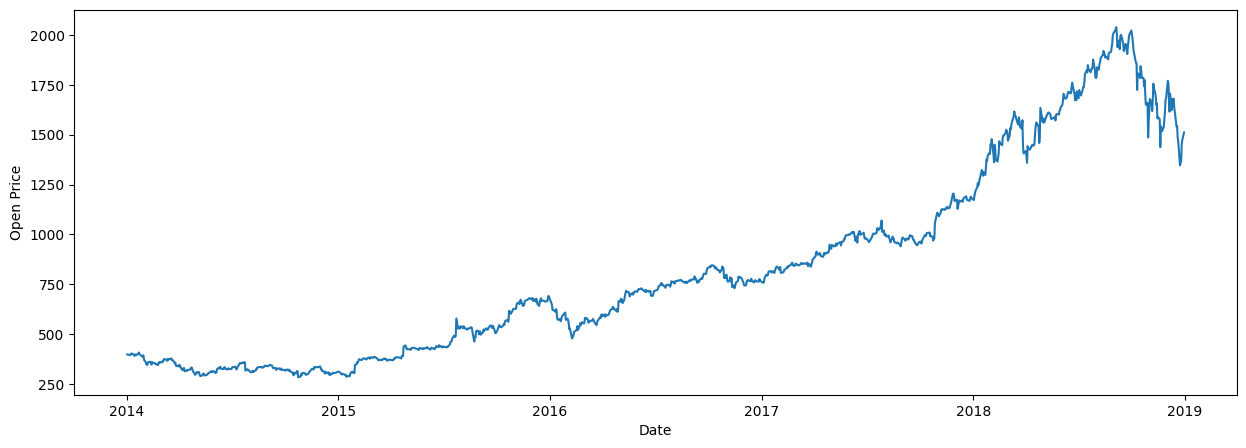

In [52]:
plt.figure(figsize = (15,5))
plt.plot(dataset)

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

### Train and test split

In [53]:
len(dataset)

1258

In [54]:
round(len(dataset) * 0.8)

1006

In [55]:
len(dataset) -round(len(dataset) * 0.8)

252

In [56]:
train_dataset = dataset.iloc[0:round(len(dataset) * 0.8)]

In [57]:
train_dataset

,Open
Date,
2014-01-02,398.799988
2014-01-03,398.290009
2014-01-06,395.850006
2014-01-07,395.040009
2014-01-08,398.470001
...,...
2017-12-21,1175.900024
2017-12-22,1172.079956
2017-12-26,1168.359985


In [58]:
test_dataset = dataset.iloc[round(len(dataset) * 0.8): ]

In [59]:
test_dataset

,Open
Date,
2017-12-29,1182.349976
2018-01-02,1172.000000
2018-01-03,1188.300049
2018-01-04,1205.000000
2018-01-05,1217.510010
...,...
2018-12-24,1346.000000
2018-12-26,1368.890015
2018-12-27,1454.199951


### Min Max Scaler

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
sc = MinMaxScaler()

In [62]:
train_dataset = sc.fit_transform(train_dataset)

In [63]:
test_dataset = sc.transform(test_dataset)

### Prepare the data for RNN model

In [64]:
train_dataset

array([[0.12428297],
       [0.12372894],
       [0.12107814],
       ...,
       [0.96032503],
       [0.97287288],
       [0.98274813]])

In [65]:
X_train = []
y_train = []

In [66]:
num_of_days = 60

In [67]:
for i in range(num_of_days, len(train_dataset)):

    X_train.append(train_dataset[i-num_of_days:i,:])
    y_train.append(train_dataset[i,:])

In [68]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [69]:
X_train.shape

(946, 60, 1)

In [70]:
y_train.shape

(946, 1)

### Build the RNN Architecture

In [71]:
from tensorflow.keras import Sequential

In [72]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense

### Init the Model

In [73]:
rnn_model = Sequential()

#### Add the input layer

In [74]:
inp_layer = Input(shape = (60, 1))

In [75]:
rnn_model.add(inp_layer)

#### Add the Simple RNN Layer

In [76]:
#kernel_initializer -- init strategy for weights
#recurrent_initializer -- init strategy for recurrent weights
#return_sequences -- to return sequential output --
#True -- return sequence, False -- Return vector
#units -- no of neurons in layer
rnn_layer_1 = SimpleRNN(kernel_initializer = "glorot_uniform",
                        recurrent_initializer = "glorot_uniform",
                        activation = "relu",
                        return_sequences = True,
                        units = 100)

In [77]:
rnn_model.add(rnn_layer_1)

In [78]:
rnn_layer_2 = SimpleRNN(kernel_initializer = "glorot_uniform",
                        recurrent_initializer = "glorot_uniform",
                        activation = "relu",
                        return_sequences = False,
                        units = 50)

In [79]:
rnn_model.add(rnn_layer_2)

### Add output layer

In [80]:
output_layer = Dense(kernel_initializer = "glorot_uniform",
                    activation = "linear",
                     units = 1 ) #regression problem

In [81]:
rnn_model.add(output_layer)

In [82]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
from tensorflow.keras.utils import plot_model

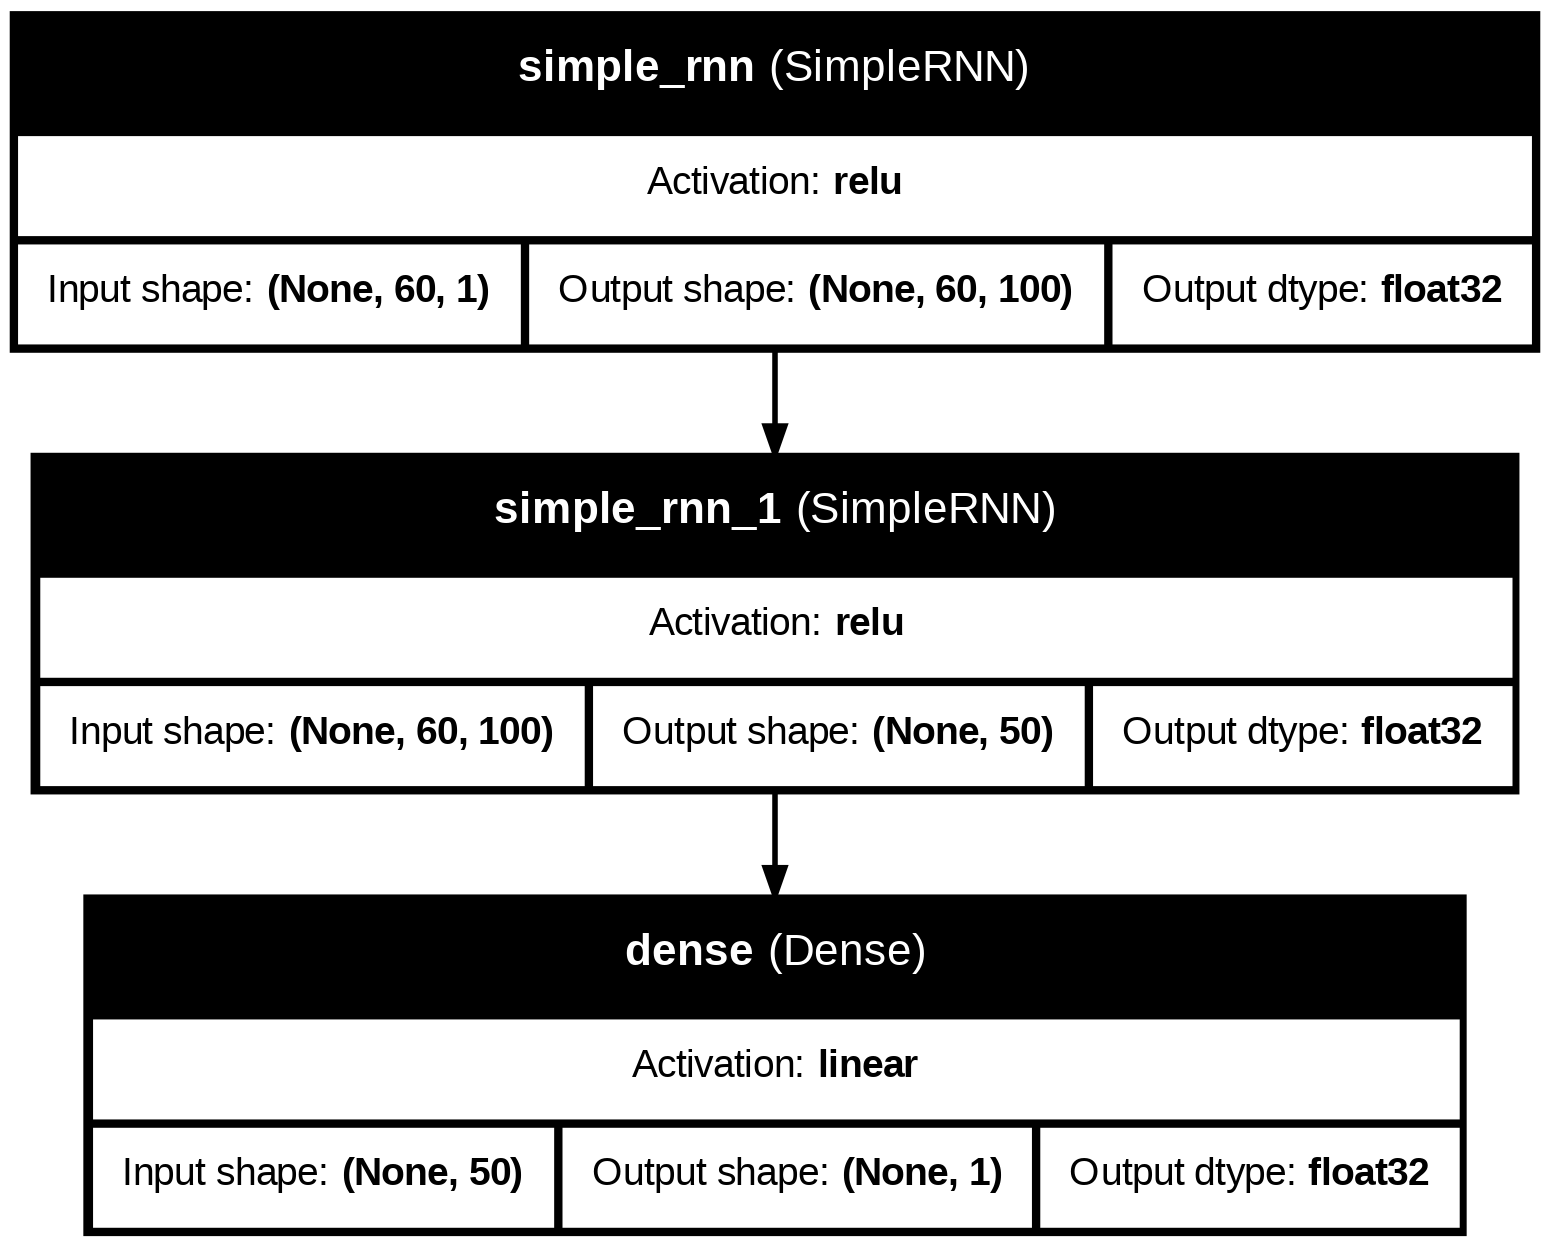

In [84]:
plot_model(rnn_model,
           show_shapes =  True,
       show_layer_names = True,
          show_dtype = True,show_layer_activations = True, expand_nested  = True )

In [85]:
import tensorflow as tf
from tensorflow.keras.metrics import Metric

In [86]:
class RMSEMetric(Metric): #inherit class Metric
    def __init__(self, name="rmse", **kwargs):
        super(RMSEMetric, self).__init__(name=name, **kwargs)
        self.sum_squared_errors = self.add_weight(name="sse", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        error = tf.math.squared_difference(y_true, y_pred)
        if sample_weight is not None:
            error = tf.multiply(error, sample_weight)
        self.sum_squared_errors.assign_add(tf.reduce_sum(error))
        self.count.assign_add(tf.cast(tf.size(y_true), dtype=self.count.dtype))

    def result(self):
        return tf.sqrt(self.sum_squared_errors / self.count)

    def reset_state(self):
        self.sum_squared_errors.assign(0.0)
        self.count.assign(0.0)

In [87]:
rnn_model.compile(loss = "mse", optimizer = "adam", metrics = [RMSEMetric()])

### Train the model

In [88]:
rnn_model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0655 - rmse: 0.2431
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.3296e-04 - rmse: 0.0208
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.3061e-04 - rmse: 0.0182
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.3897e-04 - rmse: 0.0154
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 2.6167e-04 - rmse: 0.0161
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.9822e-04 - rmse: 0.0140
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.1167e-04 - rmse: 0.0176
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.5019e-04 - rmse: 0.0122
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.4499e-04 - rmse: 0.0155
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.3731e-04 - rmse: 0.0153
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.5556e-04 - rmse: 0.0124
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.9324e

## Predictions

In [89]:
len(test_dataset)

252

In [90]:
test_data = np.concatenate((train_dataset[-60:], test_dataset), axis = 0)

In [91]:
test_data

array([[0.72767471],
       [0.74482878],
       [0.75095604],
       [0.77007647],
       [0.77380278],
       [0.76793631],
       [0.77395489],
       [0.7850252 ],
       [0.7865896 ],
       [0.78349342],
       [0.78749133],
       [0.76655658],
       [0.77039156],
       [0.76300406],
       [0.74374239],
       [0.7535199 ],
       [0.75605121],
       [0.84058319],
       [0.88063837],
       [0.89583695],
       [0.89192597],
       [0.88368031],
       [0.87644492],
       [0.89599993],
       [0.91293671],
       [0.9108508 ],
       [0.91426208],
       [0.91441419],
       [0.91104641],
       [0.91877062],
       [0.91540284],
       [0.91882499],
       [0.92764647],
       [0.91840129],
       [0.92175819],
       [0.93060142],
       [0.95200324],
       [0.99758825],
       [1.        ],
       [0.98904924],
       [0.95895617],
       [0.96433387],
       [0.9662893 ],
       [0.91676083],
       [0.92733138],
       [0.9475382 ],
       [0.9625413 ],
       [0.956

In [92]:
X_test = []
y_test = []

In [93]:
for i in range(num_of_days, len(test_data)):

    X_test.append(test_data[i-num_of_days:i,:])
    y_test.append(test_data[i,:])

In [94]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [95]:
X_test.shape

(252, 60, 1)

In [96]:
y_pred = rnn_model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [97]:
y_pred

array([[0.97802275],
       [0.97581464],
       [0.9649581 ],
       [0.9723237 ],
       [0.9902122 ],
       [1.0053941 ],
       [1.0219095 ],
       [1.0418816 ],
       [1.040285  ],
       [1.0467714 ],
       [1.0625473 ],
       [1.104596  ],
       [1.1143559 ],
       [1.0963768 ],
       [1.1032096 ],
       [1.1007065 ],
       [1.127284  ],
       [1.166362  ],
       [1.1732464 ],
       [1.1853143 ],
       [1.2035884 ],
       [1.2064377 ],
       [1.2400743 ],
       [1.2539696 ],
       [1.2757107 ],
       [1.2343494 ],
       [1.181235  ],
       [1.2316717 ],
       [1.250031  ],
       [1.2044171 ],
       [1.1736103 ],
       [1.1854942 ],
       [1.2087713 ],
       [1.2559736 ],
       [1.2667627 ],
       [1.2534621 ],
       [1.2758054 ],
       [1.2975415 ],
       [1.305065  ],
       [1.3164564 ],
       [1.3342621 ],
       [1.336594  ],
       [1.3304355 ],
       [1.2973505 ],
       [1.3019265 ],
       [1.3391353 ],
       [1.347405  ],
       [1.358

In [98]:
y_test

array([[0.97552361],
       [0.9642795 ],
       [0.98198771],
       [1.00013036],
       [1.01372111],
       [1.03380844],
       [1.05651401],
       [1.04374893],
       [1.05959932],
       [1.07442857],
       [1.12832435],
       [1.11663478],
       [1.09676467],
       [1.11637406],
       [1.10026295],
       [1.14471793],
       [1.184621  ],
       [1.17721188],
       [1.20329611],
       [1.22194947],
       [1.21542026],
       [1.2677082 ],
       [1.26086389],
       [1.29605207],
       [1.21482269],
       [1.17010685],
       [1.26520945],
       [1.24422046],
       [1.18317615],
       [1.17359425],
       [1.19669091],
       [1.21876629],
       [1.28464498],
       [1.27430252],
       [1.2624826 ],
       [1.30431948],
       [1.31557446],
       [1.31555271],
       [1.33061005],
       [1.34723187],
       [1.3418108 ],
       [1.3353902 ],
       [1.28704585],
       [1.31435771],
       [1.35668341],
       [1.3494264 ],
       [1.37493481],
       [1.389

In [99]:
y_pred = sc.inverse_transform(y_pred)

In [100]:
y_test = sc.inverse_transform(y_test)

In [101]:
y_pred

array([[1184.6504],
       [1182.6178],
       [1172.6246],
       [1179.4045],
       [1195.8706],
       [1209.8452],
       [1225.0472],
       [1243.4312],
       [1241.9615],
       [1247.9321],
       [1262.4536],
       [1301.1586],
       [1310.1423],
       [1293.5929],
       [1299.8824],
       [1297.5784],
       [1322.0425],
       [1358.013 ],
       [1364.3499],
       [1375.4581],
       [1392.279 ],
       [1394.9019],
       [1425.8636],
       [1438.6539],
       [1458.6663],
       [1420.594 ],
       [1371.7032],
       [1418.1292],
       [1435.0286],
       [1393.0419],
       [1364.6849],
       [1375.6238],
       [1397.0499],
       [1440.4987],
       [1450.4298],
       [1438.1868],
       [1458.7533],
       [1478.761 ],
       [1485.6863],
       [1496.1719],
       [1512.5616],
       [1514.7081],
       [1509.0393],
       [1478.5852],
       [1482.7974],
       [1517.0472],
       [1524.6593],
       [1534.9426],
       [1547.4987],
       [1570.0742],


In [102]:
y_test

array([[1182.349976],
       [1172.      ],
       [1188.300049],
       [1205.      ],
       [1217.51001 ],
       [1236.      ],
       [1256.900024],
       [1245.150024],
       [1259.73999 ],
       [1273.390015],
       [1323.      ],
       [1312.23999 ],
       [1293.949951],
       [1312.      ],
       [1297.170044],
       [1338.089966],
       [1374.819946],
       [1368.      ],
       [1392.01001 ],
       [1409.180054],
       [1403.170044],
       [1451.300049],
       [1445.      ],
       [1477.390015],
       [1402.619995],
       [1361.459961],
       [1449.      ],
       [1429.680054],
       [1373.48999 ],
       [1364.670044],
       [1385.930054],
       [1406.25    ],
       [1466.890015],
       [1457.369995],
       [1446.48999 ],
       [1485.      ],
       [1495.359985],
       [1495.339966],
       [1509.199951],
       [1524.5     ],
       [1519.51001 ],
       [1513.599976],
       [1469.099976],
       [1494.23999 ],
       [1533.199951],
       [15

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
mse = mean_squared_error(y_test, y_pred)

In [105]:
mse

1784.5758087124611

In [106]:
rmse = np.sqrt(mse)

In [107]:
rmse

np.float64(42.244239947150916)

On averge there is deviation of 31$ between the actual stock price and predicted stock price

1. we can expect a error of around 31 $ in prediction
2. Low error

In [108]:
mean_absolute_error(y_test, y_pred)

31.410184341486833

In [109]:
test_data_dates = dataset.iloc[round(len(dataset) * 0.8): ].index

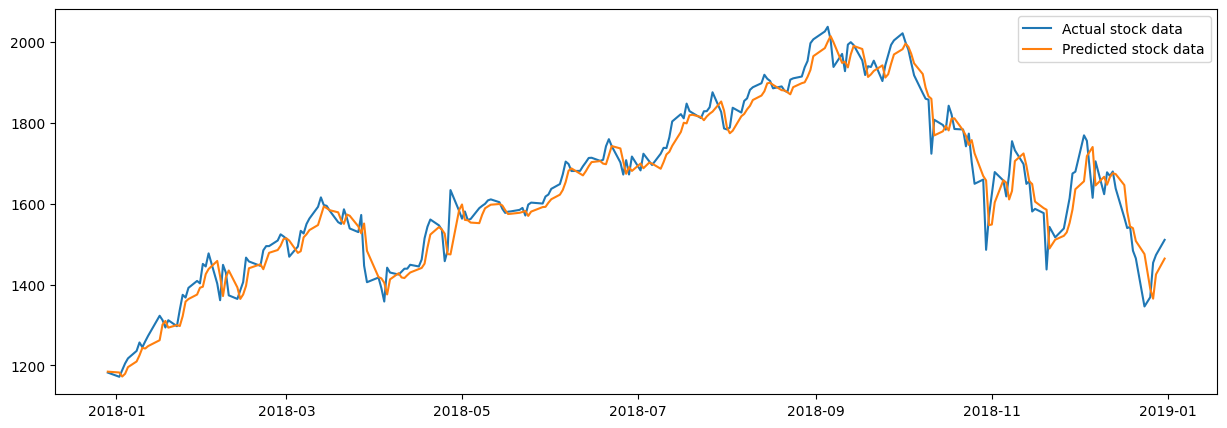

In [110]:
plt.figure(figsize = (15,5))
plt.plot(test_data_dates, y_test, label = "Actual stock data")
plt.plot(test_data_dates, y_pred, label = "Predicted stock data")
plt.legend()
plt.show()

### Save the model

In [111]:
rnn_model.save("amazon_stock_model.keras")

### Save the scaler object

In [112]:
import joblib

In [113]:
joblib.dump(sc, "amazon_stock_sc.pkl")

['amazon_stock_sc.pkl']

Conclusion:

 The conclusion of this project likely summarizes how well the RNN model performed in predicting Amazon stock prices. It might also discuss the limitations of using RNNs for stock prediction, such as their sensitivity to short-term noise or external market factors. Furthermore, the conclusion could offer insights into potential improvements, such as incorporating more features (e.g., macroeconomic indicators) or using more advanced models like LSTMs or GRUs to further enhance prediction accuracy.